In [42]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib
matplotlib.matplotlib_fname()
df = pd.read_csv('1인제외_mapping (2).csv')
df2 = pd.read_csv('클러스터최종.csv')

In [43]:
df.drop(columns='Unnamed: 0',inplace=True)
df2.drop(columns='Unnamed: 0',inplace=True)

In [44]:
df

,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,...,BEDU,BMAR,BFAM,BMON,BARA,WT_DOM,국내_여행여부,국내_숙박여부,시도,시군구
0,1,0,60000,3,20000.0,2020,2,2,2020,2,...,4,2,3,2,1,9804.983084,1,2,경기도,군포시
1,1,0,70000,3,23333.0,2020,2,8,2020,2,...,3,1,3,2,1,8112.627619,1,2,경기도,과천시
2,1,1,500000,4,125000.0,2020,2,1,2020,2,...,4,1,1,2,1,12794.875079,1,1,강원도,고성군
3,1,0,100000,4,25000.0,2020,2,8,2020,2,...,3,2,3,2,1,12310.841471,1,2,경기도,포천시
4,1,0,100000,3,33333.0,2020,2,2,2020,2,...,3,2,2,2,1,17287.409875,1,2,경기도,양주시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,2,2,500000,2,250000.0,2020,4,30,2020,5,...,3,2,2,4,17,3043.438922,1,1,서울특별시,은평구
11058,2,11,1000000,2,500000.0,2020,9,25,2020,9,...,4,2,2,9,17,2921.139870,1,1,서울특별시,강남구
11059,1,1,250000,12,20833.0,2020,9,26,2020,9,...,4,2,3,9,17,1220.697046,1,1,제주특별자치도,제주시
11060,1,0,150000,7,21429.0,2020,10,9,2020,10,...,4,2,3,10,17,1454.395755,1,2,제주특별자치도,제주시


In [ ]:
for i in ['A','B','C','D','E','F','G']:
  globals()['df_{}'.format(i)] = df[df['cluster'] == i]
  #globals()['df_{}'.format(i)].reset_index(inplace = True, drop = True)

In [ ]:
df_A

In [ ]:
df.columns

In [ ]:
df['BAGE']

In [3]:
d_list = ['D_TRA1_CASE', 'D_TRA1_S_Day', 'D_TRA1_COST', 'D_TRA1_1_SMONTH', 'D_TRA1_1_Q6_Ar', 'D_TRA1_1_Q6',
       'A1_1', 'A4_1', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15',
       'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A8_TOTAL', 'A9A', 'A9A_1',
       'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F', 'A9F_5', 'A9G', 'A9I',
       'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D', 'A90F', 'A90G', 'A90I',
       'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'A12', 'DQ1', 'DQ2', 'DQ3', 'DQ3A_1', 'DQ5', 'DQ6A', 'DQ6B', 'BSEX', 'BJOB', 'BINC1', 'BINC2', 'BEDU', 'BFAM', 'BMON',
       'BARA', 'WT_DOM', '국내_숙박여부', '국내_연간여행경험_국내숙박', '국내_연간여행경험_국내당일',
       '국내_연간여행경험_관광숙박', '국내_연간여행경험_관광당일', '국내_월별여행경험_국내숙박', '국내_월별여행경험_국내당일',
       '국내_월별여행경험_관광숙박', '국내_월별여행경험_관광당일']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
for i in d_list:
    fig = plt.figure()
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    month_d = df_A[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax1 = fig.add_axes([0,0,1,1], aspect=1)
    ax1.pie(num, labels=info, autopct="%0.1f%%")
    ax1.set_title('cluster A ' + i)


    month_d = df_B[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax2 = fig.add_axes([0,0,3,1], aspect=1)
    ax2.pie(num, labels=info, autopct="%0.1f%%")
    ax2.set_title('cluster B ' + i)

    month_d = df_C[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax3 = fig.add_axes([0,0,5,1], aspect=1)
    ax3.pie(num, labels=info, autopct="%0.1f%%")
    ax3.set_title('cluster C ' + i)

    month_d = df_D[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax4 = fig.add_axes([0,0,7,1], aspect=1)
    ax4.pie(num, labels=info, autopct="%0.1f%%")
    ax4.set_title('cluster D ' + i)

    month_d = df_E[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax5 = fig.add_axes([0,0,9,1], aspect=1)
    ax5.pie(num, labels=info, autopct="%0.1f%%")
    ax5.set_title('cluster E ' + i)

    month_d = df_F[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax5 = fig.add_axes([0,0,11,1], aspect=1)
    ax5.pie(num, labels=info, autopct="%0.1f%%")
    ax5.set_title('cluster F ' + i)
    
    month_d = df_G[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax5 = fig.add_axes([0,0,13,1], aspect=1)
    ax5.pie(num, labels=info, autopct="%0.1f%%")
    ax5.set_title('cluster G ' + i)
    plt.show()

In [ ]:
df['SAGE']

In [ ]:
for j in ['SAGE','A8_TOTAL', 'A9A', 'A9A_1',
       'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F', 'A9F_5', 'A9G', 'A9I',
       'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D', 'A90F', 'A90G', 'A90I',
       'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'A12']:
    
    df.groupby(['cluster']).mean().plot(kind='pie', y=j,autopct='%1.1f%%')
    plt.rc('font', family='BarunGothic')
    plt.rcParams['figure.figsize'] = (5,5)
    plt.show()

In [ ]:
df.groupby(['cluster']).mean()['BAGE']

In [ ]:
df.groupby(['cluster']).mean()['SAGE'].plot()

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x="SAGE", hue="cluster", data=df)
plt.show()

c:\users\minisong\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


KeyError: 'A9I_1'

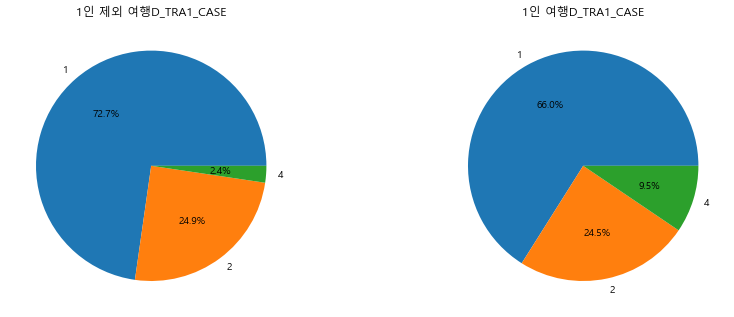

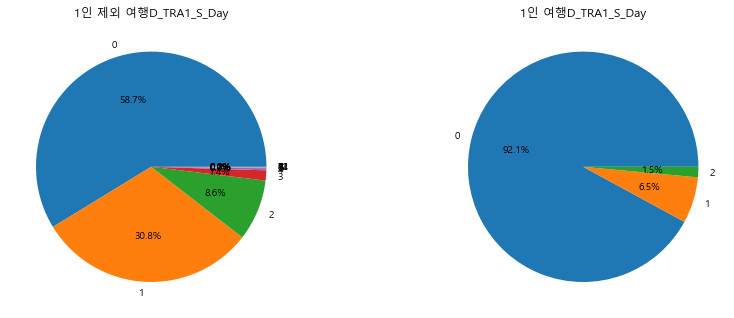

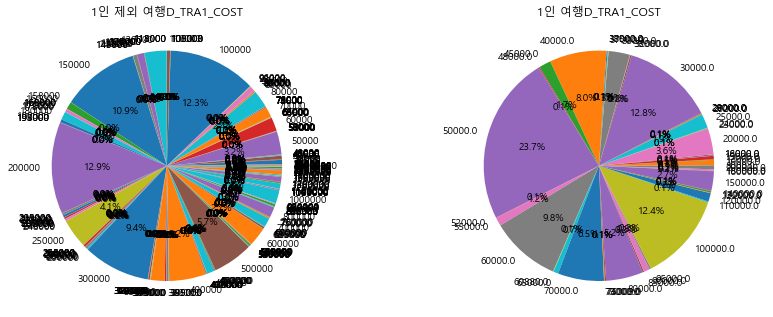

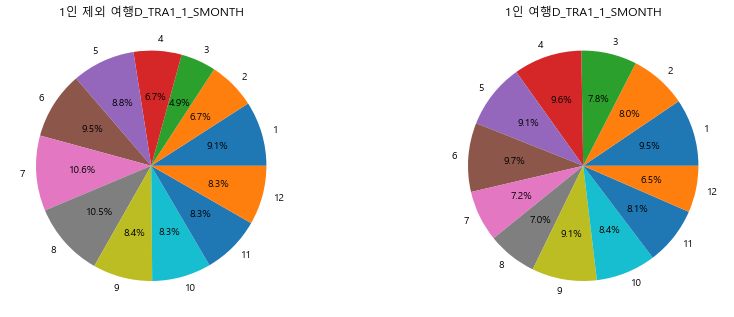

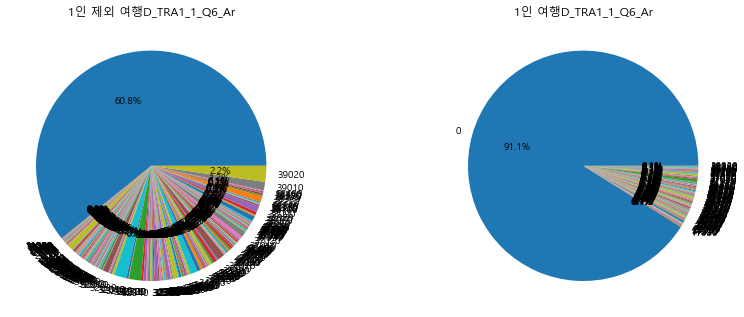

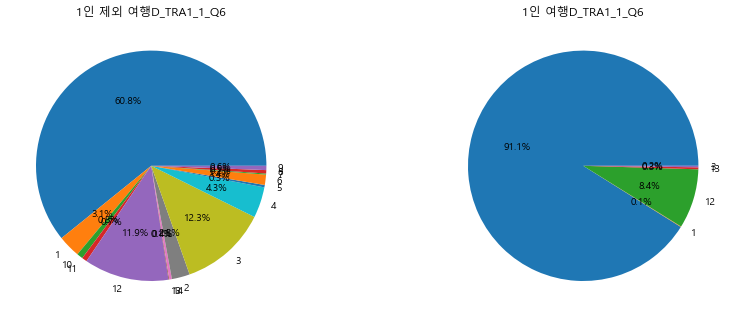

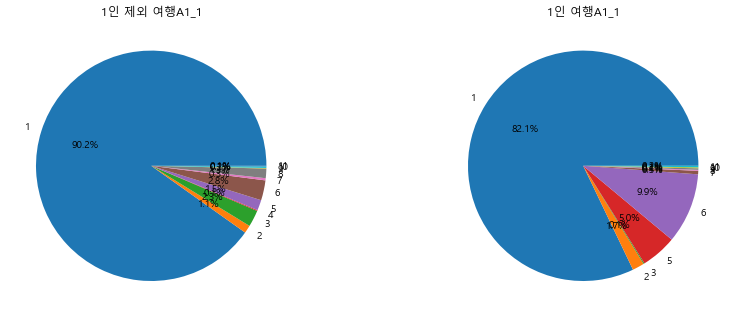

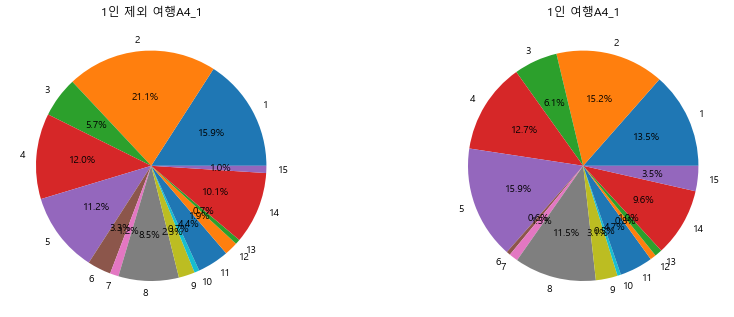

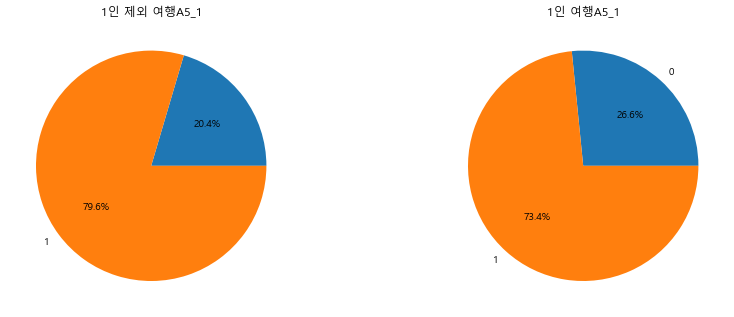

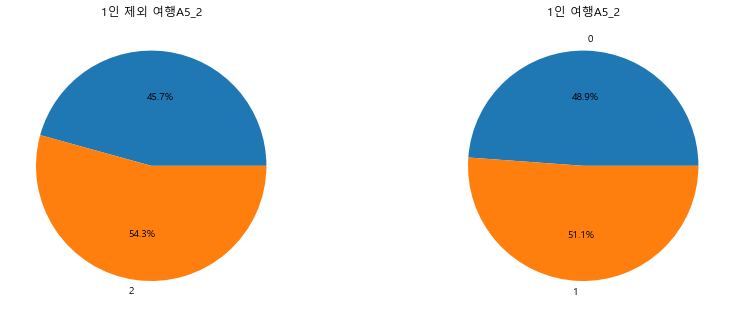

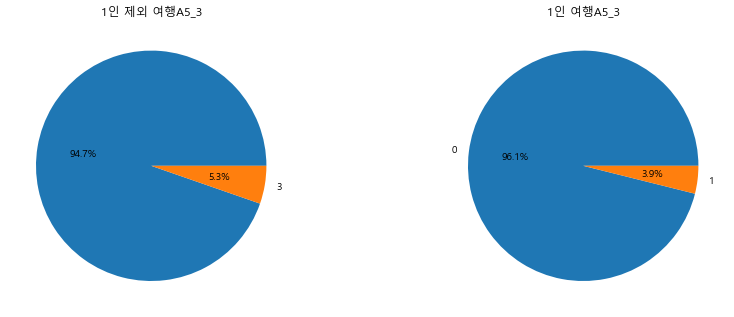

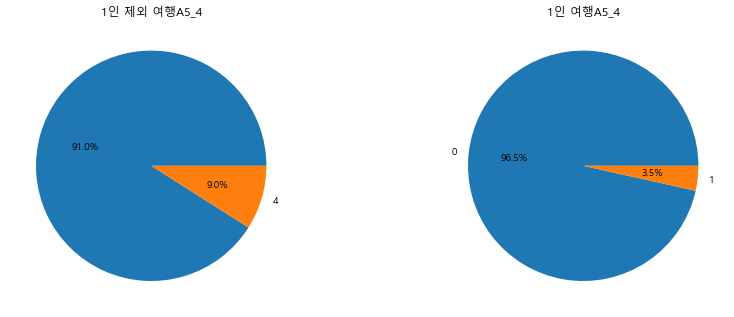

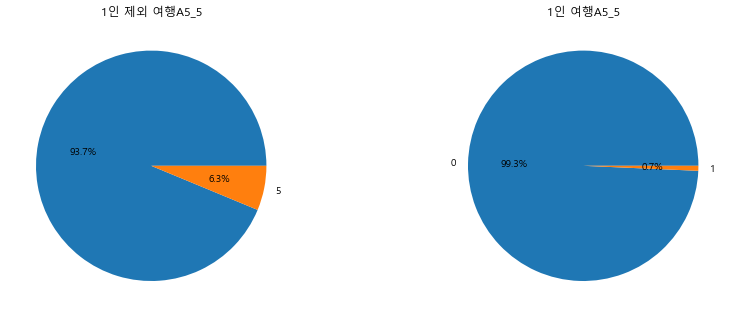

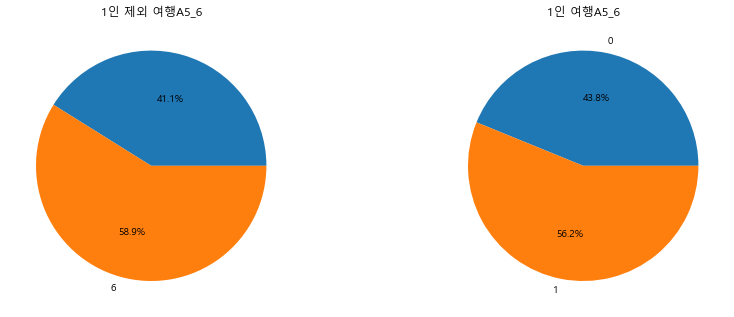

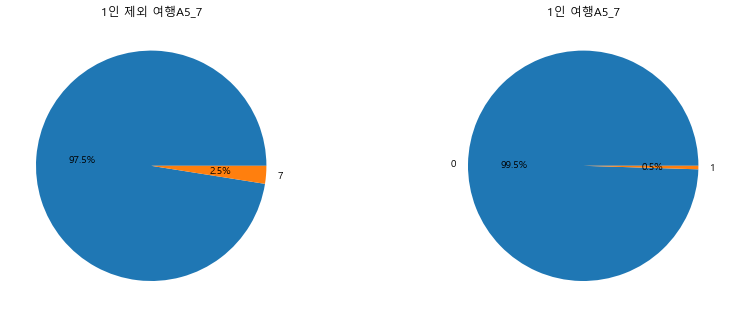

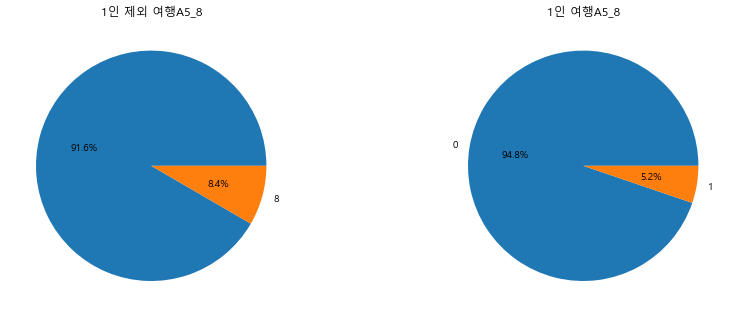

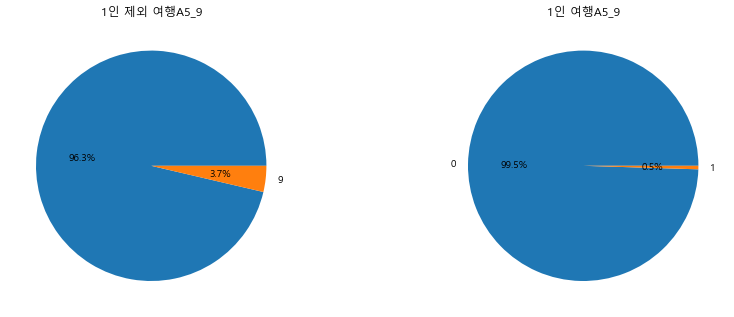

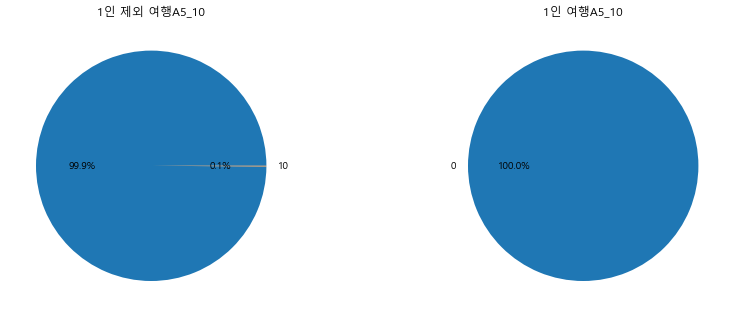

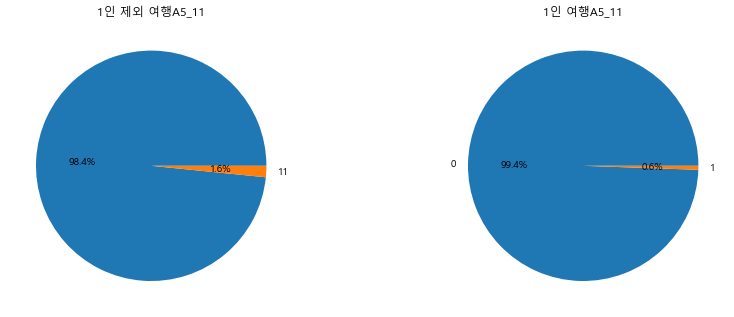

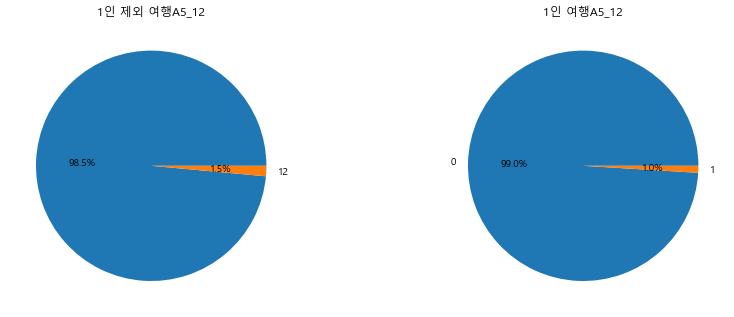

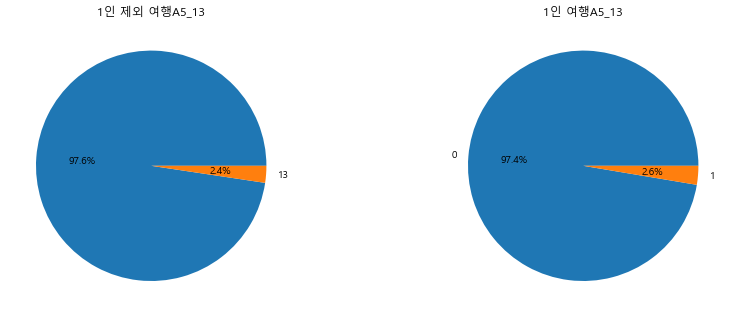

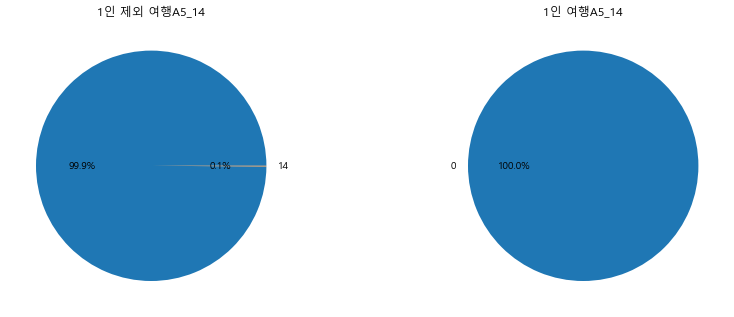

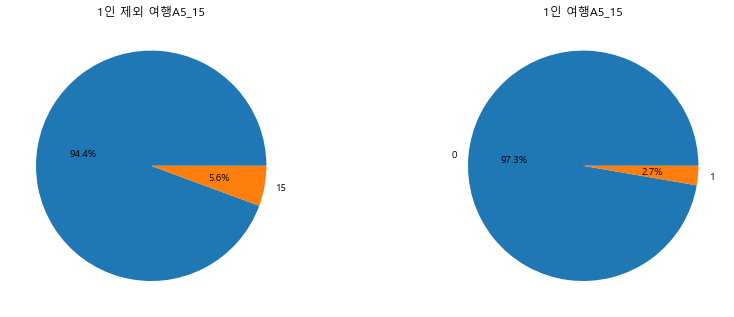

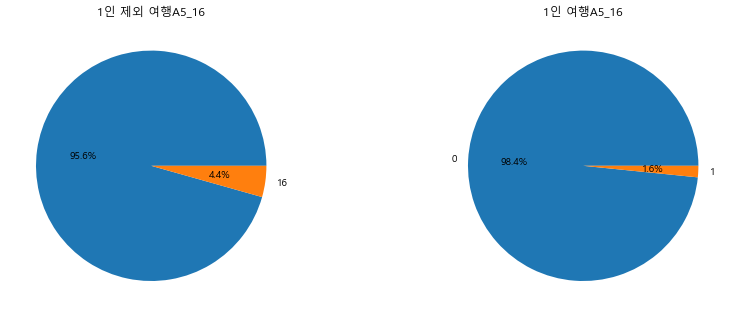

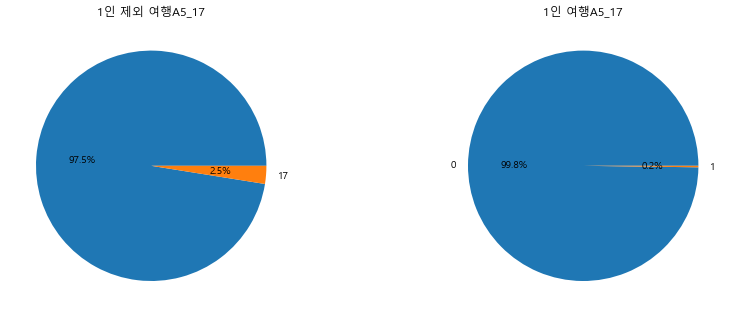

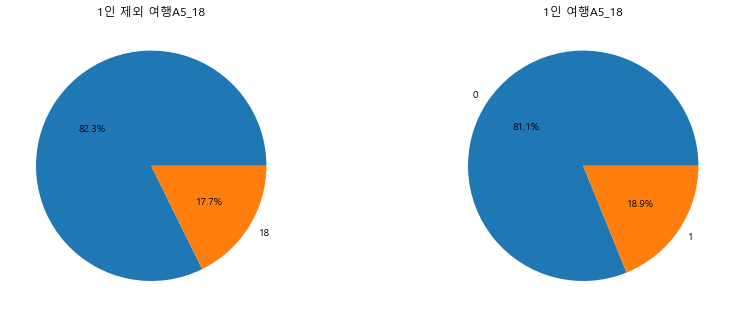

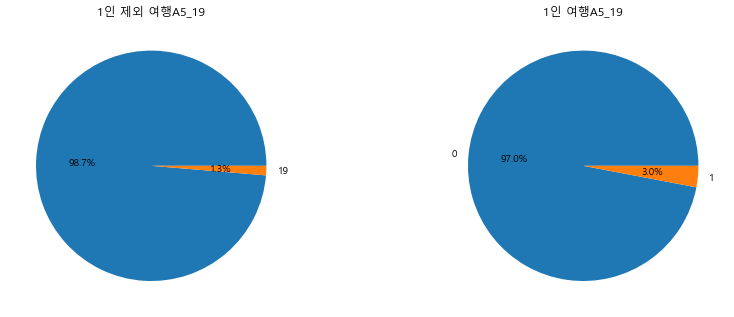

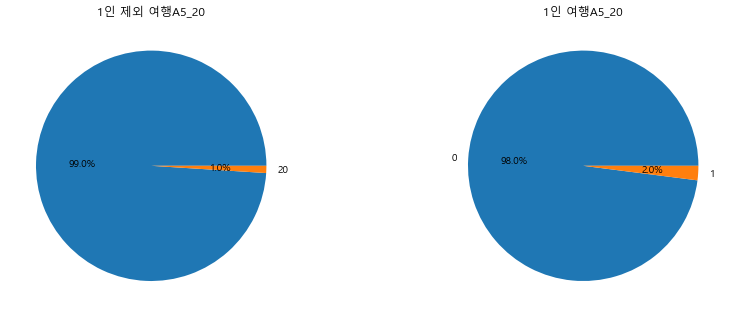

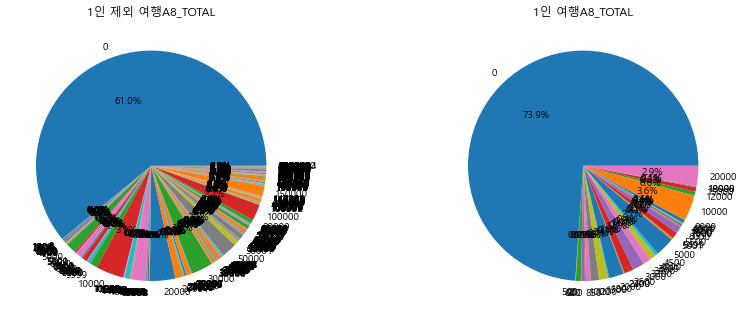

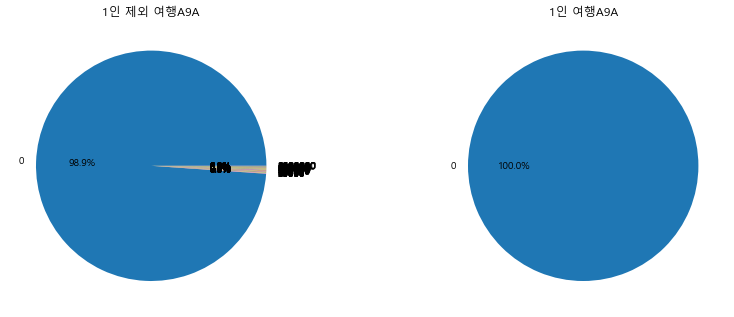

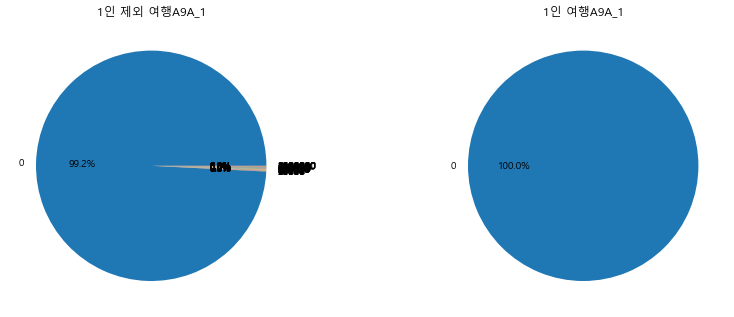

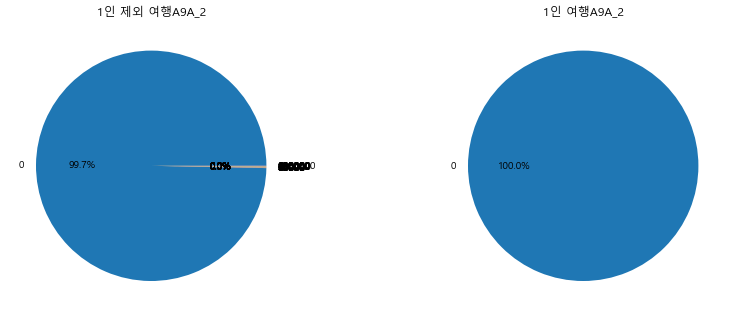

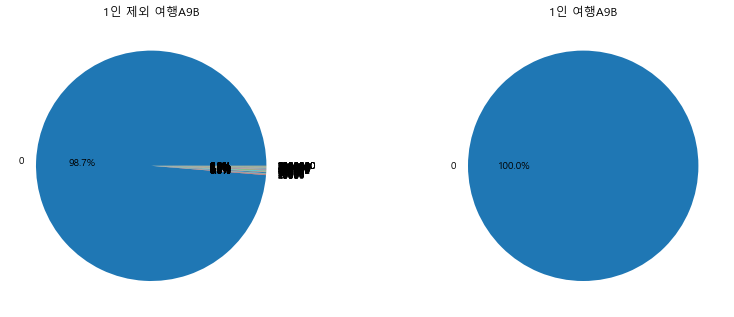

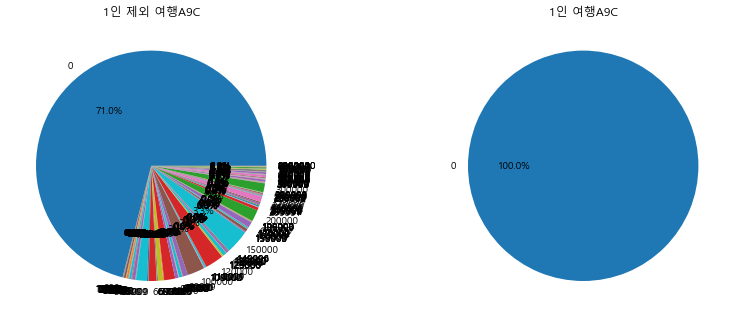

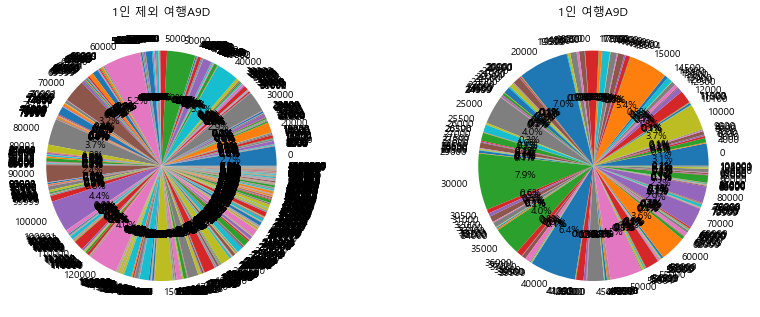

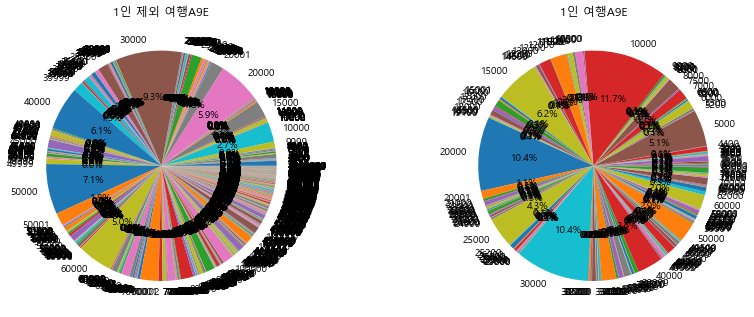

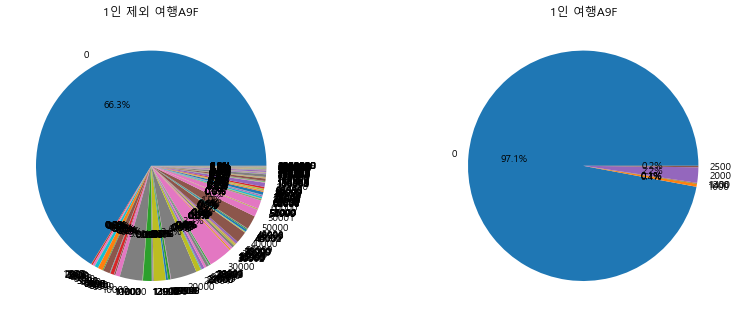

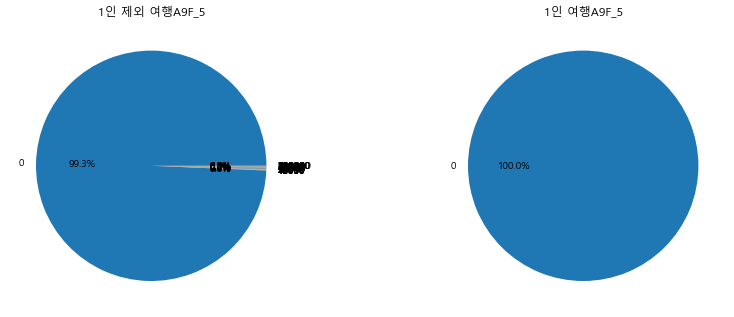

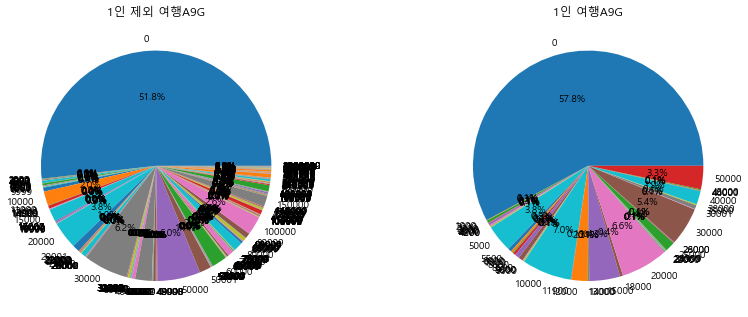

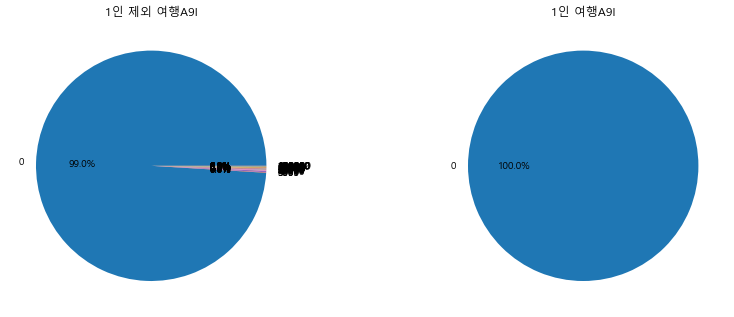

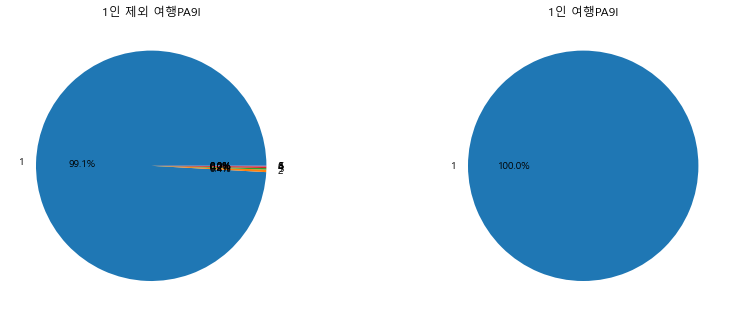

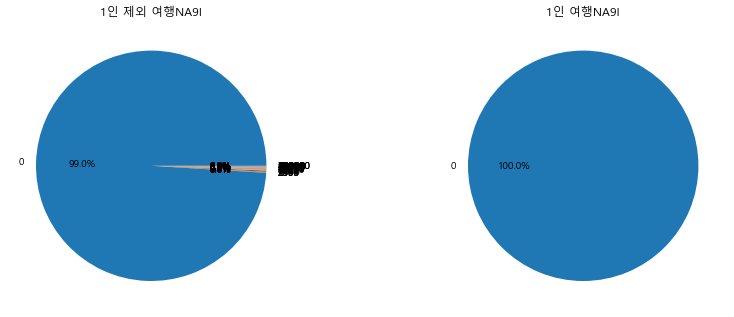

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
for i in d_list:
    fig = plt.figure()
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    month_d = df[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax1 = fig.add_axes([0,0,1,1], aspect=1)
    ax1.pie(num, labels=info, autopct="%0.1f%%")
    ax1.set_title("1인 제외 여행" + i)
    
    
    month_d = df2[i].value_counts()
    month_d.sort_index(inplace=True)
    info = list(month_d.index)
    num = list(month_d)
    ax2 = fig.add_axes([0,0,3,1], aspect=1)
    ax2.pie(num, labels=info, autopct="%0.1f%%")
    ax2.set_title('1인 여행' + i)


<Figure size 432x288 with 0 Axes>

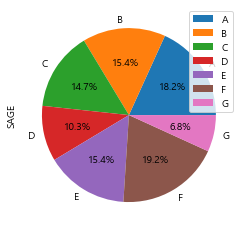

<Figure size 360x360 with 0 Axes>

findfont: Font family ['BarunGothic'] not found. Falling back to DejaVu Sans.


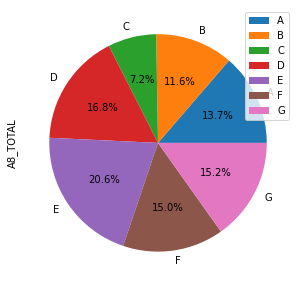

<Figure size 360x360 with 0 Axes>

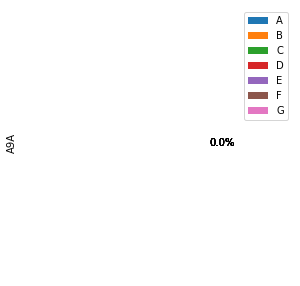

<Figure size 360x360 with 0 Axes>

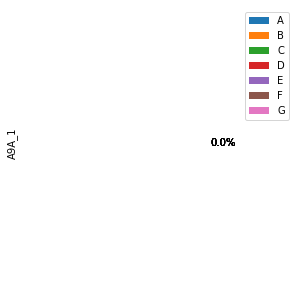

<Figure size 360x360 with 0 Axes>

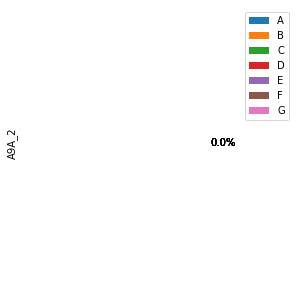

<Figure size 360x360 with 0 Axes>

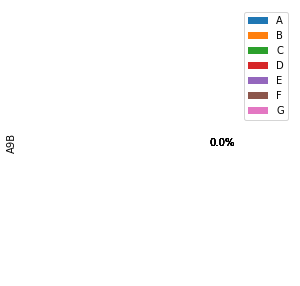

<Figure size 360x360 with 0 Axes>

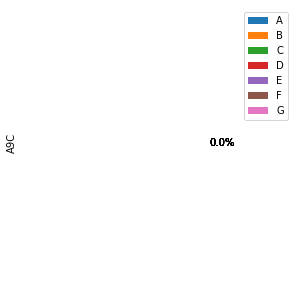

<Figure size 360x360 with 0 Axes>

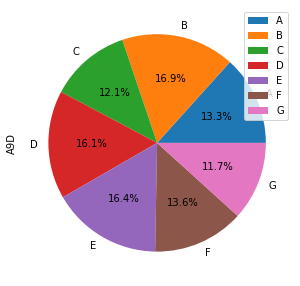

<Figure size 360x360 with 0 Axes>

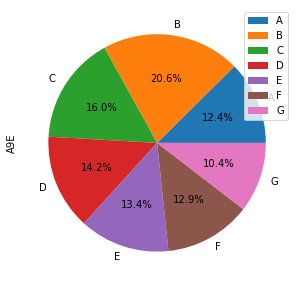

<Figure size 360x360 with 0 Axes>

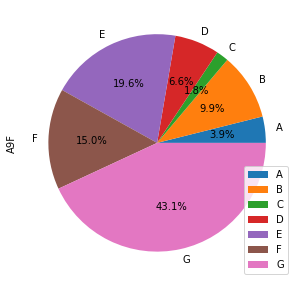

<Figure size 360x360 with 0 Axes>

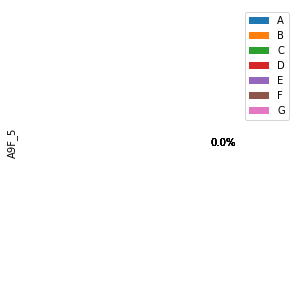

<Figure size 360x360 with 0 Axes>

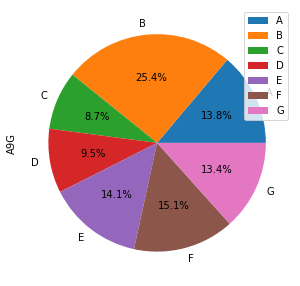

<Figure size 360x360 with 0 Axes>

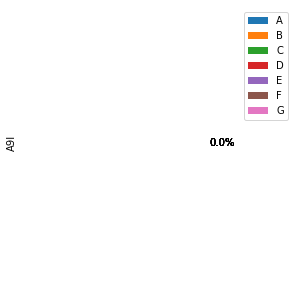

<Figure size 360x360 with 0 Axes>

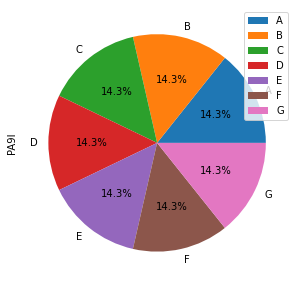

<Figure size 360x360 with 0 Axes>

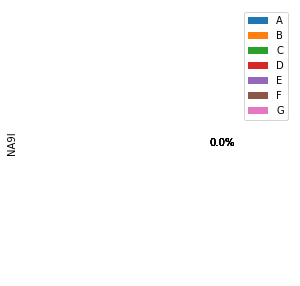

<Figure size 360x360 with 0 Axes>

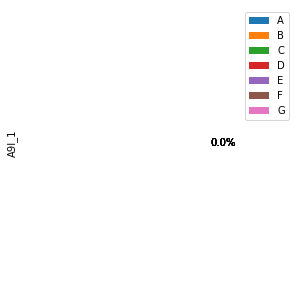

<Figure size 360x360 with 0 Axes>

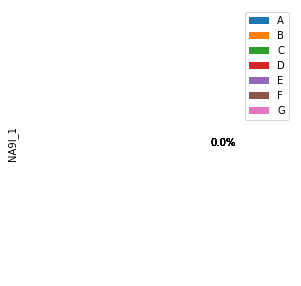

<Figure size 360x360 with 0 Axes>

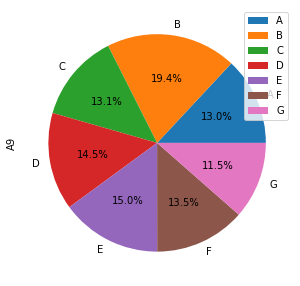

<Figure size 360x360 with 0 Axes>

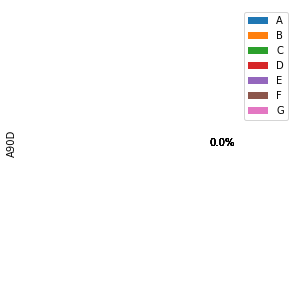

<Figure size 360x360 with 0 Axes>

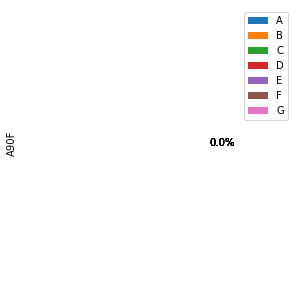

<Figure size 360x360 with 0 Axes>

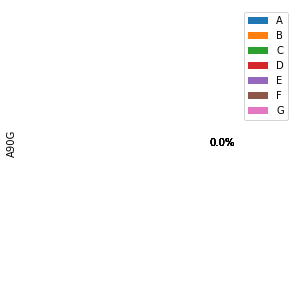

<Figure size 360x360 with 0 Axes>

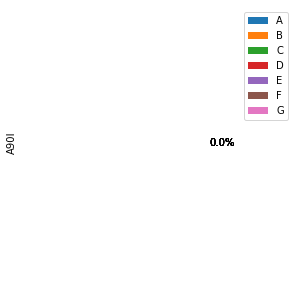

<Figure size 360x360 with 0 Axes>

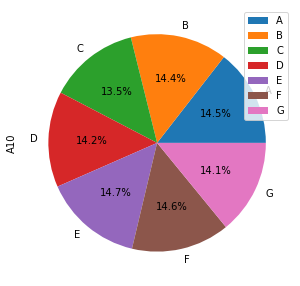

<Figure size 360x360 with 0 Axes>

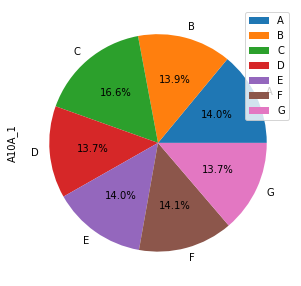

<Figure size 360x360 with 0 Axes>

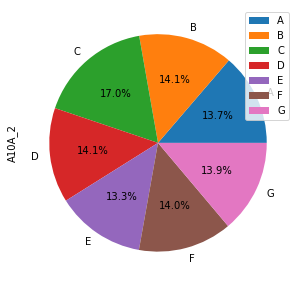

<Figure size 360x360 with 0 Axes>

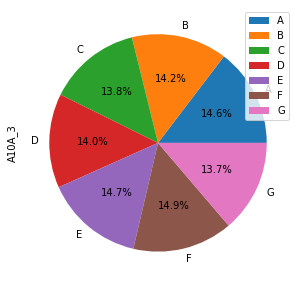

<Figure size 360x360 with 0 Axes>

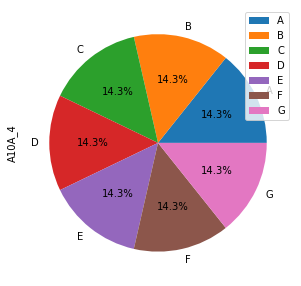

<Figure size 360x360 with 0 Axes>

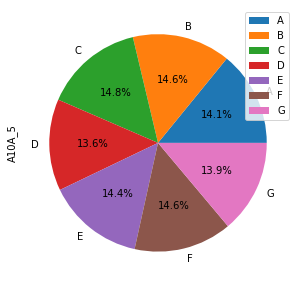

<Figure size 360x360 with 0 Axes>

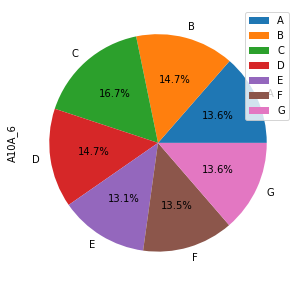

<Figure size 360x360 with 0 Axes>

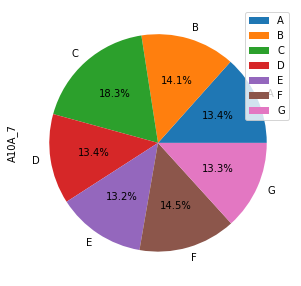

<Figure size 360x360 with 0 Axes>

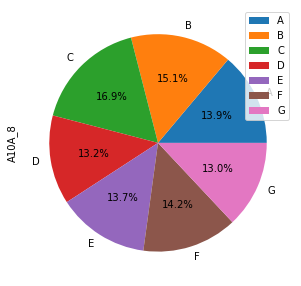

<Figure size 360x360 with 0 Axes>

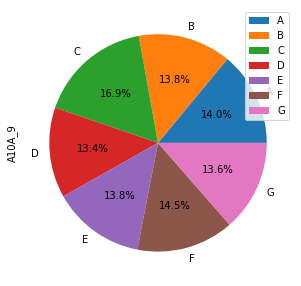

<Figure size 360x360 with 0 Axes>

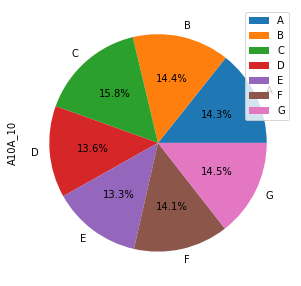

<Figure size 360x360 with 0 Axes>

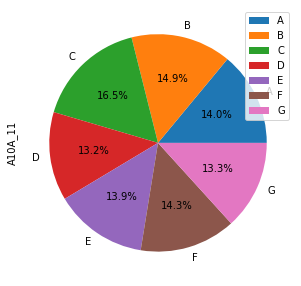

<Figure size 360x360 with 0 Axes>

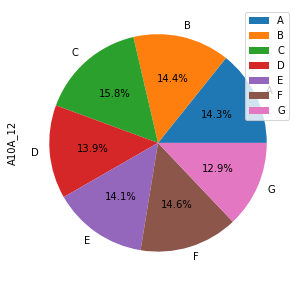

<Figure size 360x360 with 0 Axes>

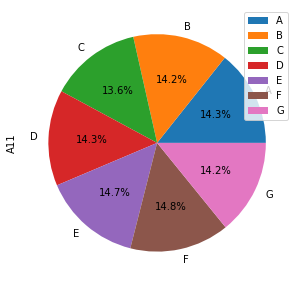

<Figure size 360x360 with 0 Axes>

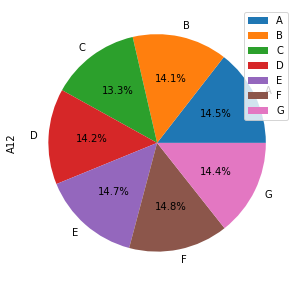

In [12]:
for j in ['SAGE','A8_TOTAL', 'A9A', 'A9A_1',
       'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F', 'A9F_5', 'A9G', 'A9I',
       'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D', 'A90F', 'A90G', 'A90I',
       'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'A12']:
    fig = plt.figure()
    
    df2.groupby(['cluster']).mean().plot(kind='pie', y=j,autopct='%1.1f%%')
    plt.rc('font', family='BarunGothic')
    plt.rcParams['figure.figsize'] = (5,5)
    plt.show()

In [37]:
df['1인여부'] = '1인이상'
df2['1인여부'] = '1인'

In [41]:
df

,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,...,BMAR,BFAM,BMON,BARA,WT_DOM,국내_여행여부,국내_숙박여부,시도,시군구,1인여부
0,1,0,60000,3,20000.0,2020,2,2,2020,2,...,2,3,2,1,9804.983084,1,2,경기도,군포시,1인이상
1,1,0,70000,3,23333.0,2020,2,8,2020,2,...,1,3,2,1,8112.627619,1,2,경기도,과천시,1인이상
2,1,1,500000,4,125000.0,2020,2,1,2020,2,...,1,1,2,1,12794.875079,1,1,강원도,고성군,1인이상
3,1,0,100000,4,25000.0,2020,2,8,2020,2,...,2,3,2,1,12310.841471,1,2,경기도,포천시,1인이상
4,1,0,100000,3,33333.0,2020,2,2,2020,2,...,2,2,2,1,17287.409875,1,2,경기도,양주시,1인이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11057,2,2,500000,2,250000.0,2020,4,30,2020,5,...,2,2,4,17,3043.438922,1,1,서울특별시,은평구,1인이상
11058,2,11,1000000,2,500000.0,2020,9,25,2020,9,...,2,2,9,17,2921.139870,1,1,서울특별시,강남구,1인이상
11059,1,1,250000,12,20833.0,2020,9,26,2020,9,...,2,3,9,17,1220.697046,1,1,제주특별자치도,제주시,1인이상
11060,1,0,150000,7,21429.0,2020,10,9,2020,10,...,2,3,10,17,1454.395755,1,2,제주특별자치도,제주시,1인이상


In [45]:
df3 = pd.concat([df,df2],axis=0,join='inner')

df3

In [40]:
df3

,D_TRA1_CASE,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,D_TRA1_1_SYEAR,D_TRA1_1_SMONTH,D_TRA1_1_SDAY,D_TRA1_1_EYEAR,D_TRA1_1_EMONTH,...,국내_연간여행경험_국내숙박,국내_연간여행경험_국내당일,국내_연간여행경험_관광숙박,국내_연간여행경험_관광당일,국내_월별여행경험_국내숙박,국내_월별여행경험_국내당일,국내_월별여행경험_관광숙박,국내_월별여행경험_관광당일,cluster,1인여부
0,1,0,60000,3,20000.0,2020,2,2,2020,2,...,0,0,0,0,0,1,0,1,D,1인
1,1,0,70000,3,23333.0,2020,2,8,2020,2,...,0,0,0,0,0,1,0,1,D,1인
2,1,1,500000,4,125000.0,2020,2,1,2020,2,...,0,0,0,0,0,1,0,1,G,1인
3,1,0,100000,4,25000.0,2020,2,8,2020,2,...,0,0,0,0,0,1,0,1,D,1인
4,1,0,100000,3,33333.0,2020,2,2,2020,2,...,0,0,0,0,0,1,0,1,D,1인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,1,1,1500000,2,750000.0,2020,7,18,2020,7,...,0,0,0,0,0,1,0,1,C,1인
1433,1,9,2500000,4,625000.0,2020,7,17,2020,7,...,0,0,0,0,0,1,0,1,E,1인
1434,1,1,1500000,2,750000.0,2020,8,22,2020,8,...,0,0,0,0,0,1,0,1,A,1인
1435,1,2,2000000,2,1000000.0,2020,9,25,2020,9,...,0,0,0,0,0,1,0,1,C,1인


In [47]:
df['A8_TOTAL'].mean()

21605.519526306274

In [67]:
df2['국내 여행여부'].isnull().sum()

KeyError: '국내 여행여부'

In [69]:
df['D_TRA1_S_Day'].mean()

0.5476405713252577

In [73]:
df2[df2['D_TRA1_S_Day'].notnull()]['D_TRA1_S_Day'].mean()

0.09394572025052192